In [8]:
from brainsmash.mapgen.base import Base
from brainsmash.mapgen.eval import base_fit
from brainsmash.mapgen.stats import pearsonr, pairwise_r, nonparp
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats

In [9]:
def brainSMASH(distMat,map1,map2,labels):
    gen = Base(map1,distMat,resample=True,nh=10,pv=30)
    surrogate_maps = gen(n=1000)
    
    #generate all surrogate correlations
    surrogate_brainmap_corrs = pearsonr(map2, surrogate_maps).flatten()
    surrogate_pairwise_corrs = pairwise_r(surrogate_maps, flatten=True)
    
    naive_surrogates = np.array([np.random.permutation(map1) for _ in range(5000)])
    naive_brainmap_corrs = pearsonr(map2, naive_surrogates).flatten()
    naive_pairwise_corrs = pairwise_r(naive_surrogates, flatten=True)
    
    # The observed correlation
    test_stat = stats.pearsonr(map1, map2)[0]
    
    #Plotting
    sac = '#377eb8'  # autocorr-preserving color
    rc = '#e41a1c'  # randomly shuffled color
    bins = np.linspace(-1, 1, 51)  # correlation b

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_axes([0.2, 0.25, 0.6, 0.6])  # autocorr preserving
    ax2 = ax.twinx()  # randomly shuffled

    # plot the data
    ax.axvline(test_stat, 0, 0.8, color='k', linestyle='dashed', lw=1)
    ax.hist(surrogate_brainmap_corrs, bins=bins, color=sac, alpha=1,
        density=True, clip_on=False, zorder=1)
    ax2.hist(naive_brainmap_corrs, bins=bins, color=rc, alpha=0.7,
        density=True, clip_on=False, zorder=2)

    # make the plot nice...
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    ax.spines['left'].set_color(sac)
    ax.tick_params(axis='y', colors=sac)
    ax2.spines['right'].set_color(rc)
    ax2.tick_params(axis='y', colors=rc)
    ax.set_ylim(0, 2)
    ax2.set_ylim(0, 6)
    ax.set_xlim(-1, 1)
    [s.set_visible(False) for s in [
        ax.spines['top'], ax.spines['right'], ax2.spines['top'], ax2.spines['left']]]
    ax.text(0.97, .96, 'Permutation', ha='right',va='bottom',
        color=rc, transform=ax.transAxes)
    ax.text(0.97, .9, 'brainSMASH', ha='right', va='bottom',
        color=sac, transform=ax.transAxes)
    ax.text(test_stat, 1.65, "%s\nmap"%labels[0], ha='center', va='bottom')
    ax.text(0.5, -0.2, "Pearson correlation\nwith %s map"%labels[1],
        ha='center', va='top', transform=ax.transAxes)
    ax.text(-0.3, 0.5, "Density", rotation=90, ha='left', va='center', transform=ax.transAxes)
    plt.title(labels[2])
    plt.show()
    
    
#     base_fit(
#         x=map1,
#         D=distMat,
#         nsurr=100,
#         nh=10,  # these are default kwargs, but shown here for demonstration
#         deltas=np.arange(0.1, 1, 0.1),
#         pv=10) 
#     base_fit(
#         x=map1,
#         D=distMat,
#         nsurr=100,
#         nh=10,  # these are default kwargs, but shown here for demonstration
#         deltas=np.arange(0.1, 1, 0.1),
#         pv=20) 
    
#     base_fit(
#         x=map1,
#         D=distMat,
#         nsurr=100,
#         nh=10,  # these are default kwargs, but shown here for demonstration
#         deltas=np.arange(0.1, 1, 0.1),
#         pv=25) 
    base_fit(
        x=map1,
        D=distMat,
        nsurr=100,
        nh=10,  # these are default kwargs, but shown here for demonstration
        deltas=np.arange(0.1, 1, 0.1),
        pv=30) 
    
    print("r = ", test_stat)
    print("Spatially naive p-value = ", nonparp(test_stat, naive_brainmap_corrs))
    print("SA-corrected p-value = ", nonparp(test_stat, surrogate_brainmap_corrs))

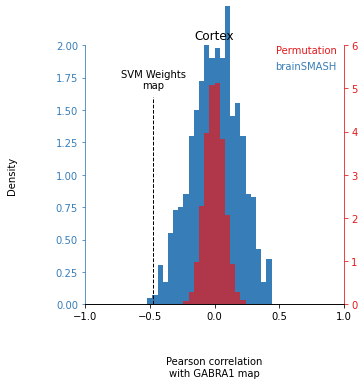

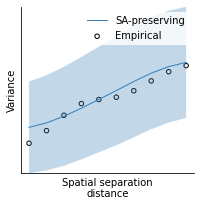

r =  -0.47270076637344144
Spatially naive p-value =  0.0
SA-corrected p-value =  0.002


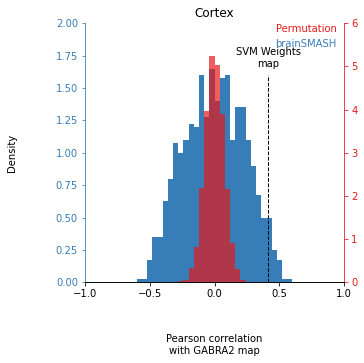

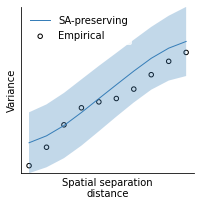

r =  0.4158216342323759
Spatially naive p-value =  0.0
SA-corrected p-value =  0.058


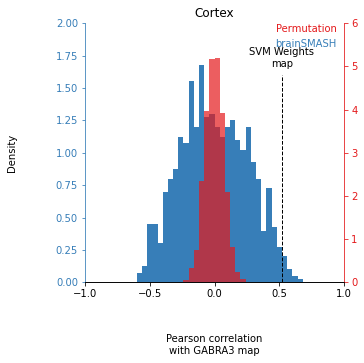

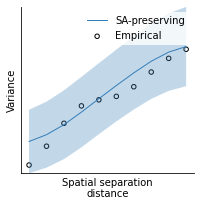

r =  0.5203110910274453
Spatially naive p-value =  0.0
SA-corrected p-value =  0.023


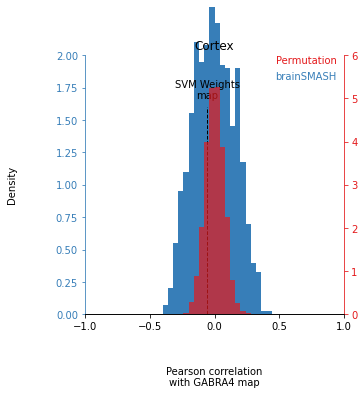

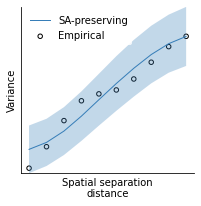

r =  -0.057448168491482654
Spatially naive p-value =  0.4298
SA-corrected p-value =  0.744


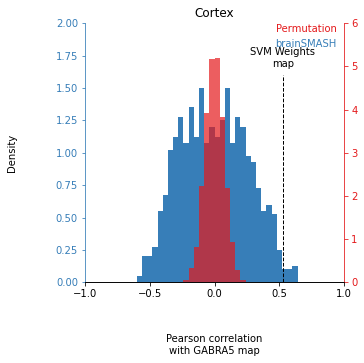

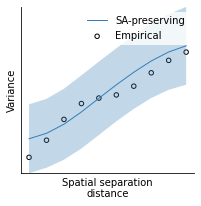

r =  0.5253869789506704
Spatially naive p-value =  0.0
SA-corrected p-value =  0.021


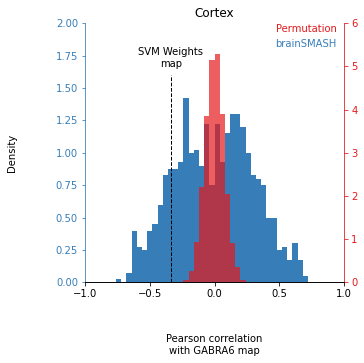

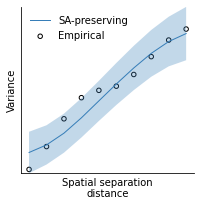

r =  -0.3385785922657645
Spatially naive p-value =  0.0
SA-corrected p-value =  0.281


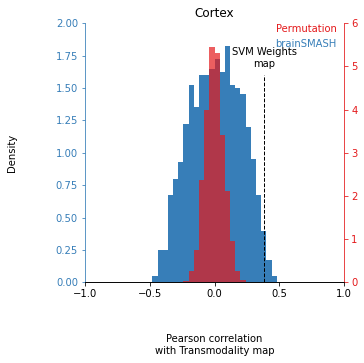

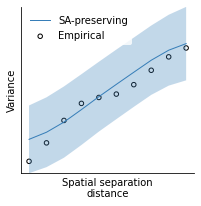

r =  0.3820621248167573
Spatially naive p-value =  0.0
SA-corrected p-value =  0.028


In [10]:
# Cortex, signed SVM Weights
distMat = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_distMat.csv",delimiter=",")
GABRA1 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_GABRA1.csv")
GABRA2 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_GABRA2.csv")
GABRA3 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_GABRA3.csv")
GABRA4 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_GABRA4.csv")
GABRA5 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_GABRA5.csv")
GABRA6 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_GABRA6.csv")

transmodality = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_transmodality.csv")
svm_weights = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_SVM_weights.csv",delimiter=",")

brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA1,labels=["SVM Weights","GABRA1","Cortex"])
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA2,labels=["SVM Weights","GABRA2","Cortex"])
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA3,labels=["SVM Weights","GABRA3","Cortex"])
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA4,labels=["SVM Weights","GABRA4","Cortex"])
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA5,labels=["SVM Weights","GABRA5","Cortex"])
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA6,labels=["SVM Weights","GABRA6","Cortex"])
brainSMASH(distMat=distMat,map1=svm_weights,map2=transmodality,labels=["SVM Weights","Transmodality","Cortex"])

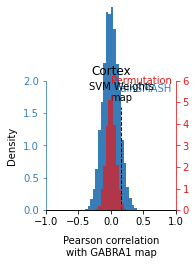

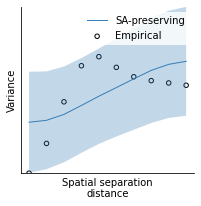

r =  0.16246769567310795
Spatially naive p-value =  0.0246
SA-corrected p-value =  0.1892


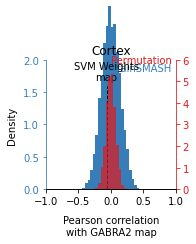

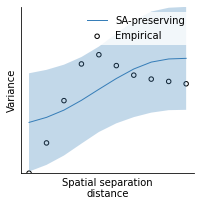

r =  -0.06675197133655258
Spatially naive p-value =  0.3574
SA-corrected p-value =  0.6512


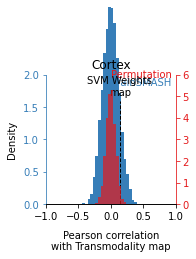

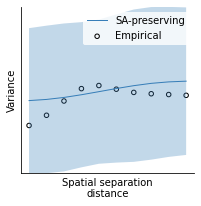

r =  0.13782582506474073
Spatially naive p-value =  0.0562
SA-corrected p-value =  0.2864


In [17]:
# Cortex, Absolute SVM Weights
distMat = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_distMat.csv",delimiter=",")
GABRA1 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_GABRA1.csv")
transmodality = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_transmodality.csv")
abs_svm_weights = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_absolute_SVM_weights.csv",delimiter=",")

brainSMASH(distMat=distMat,map1=abs_svm_weights,map2=GABRA1,labels=["SVM Weights","GABRA1","Cortex"])
brainSMASH(distMat=distMat,map1=abs_svm_weights,map2=GABRA2,labels=["SVM Weights","GABRA2","Cortex"])
brainSMASH(distMat=distMat,map1=abs_svm_weights,map2=transmodality,labels=["SVM Weights","Transmodality","Cortex"])

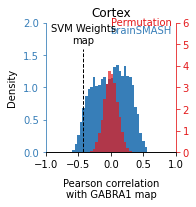

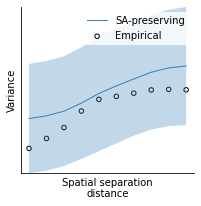

r =  -0.42988578996255533
Spatially naive p-value =  0.0
SA-corrected p-value =  0.0709


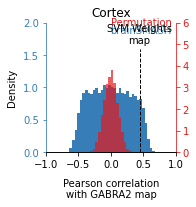

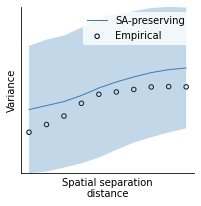

r =  0.44246232096401544
Spatially naive p-value =  0.0
SA-corrected p-value =  0.1673


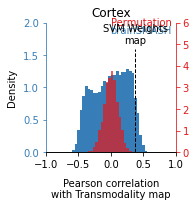

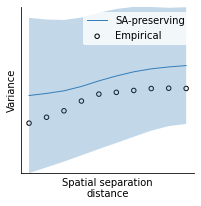

r =  0.3785695673256126
Spatially naive p-value =  0.0
SA-corrected p-value =  0.1606


In [29]:
# Left Cortex, SVM Weights
distMat_left = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_left_distMat.csv",delimiter=",")
GABRA1_left = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_left_GABRA1.csv")
GABRA2_left = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_left_GABRA2.csv")
transmodality_left = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_left_transmodality.csv")
svm_weights_left = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_left_SVM_weights.csv",delimiter=",")

brainSMASH(distMat=distMat_left,map1=svm_weights_left,map2=GABRA1_left,labels=["SVM Weights","GABRA1","Cortex"])
brainSMASH(distMat=distMat_left,map1=svm_weights_left,map2=GABRA2_left,labels=["SVM Weights","GABRA2","Cortex"])
brainSMASH(distMat=distMat_left,map1=svm_weights_left,map2=transmodality_left,labels=["SVM Weights","Transmodality","Cortex"])

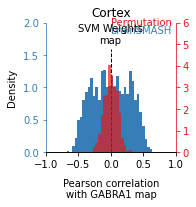

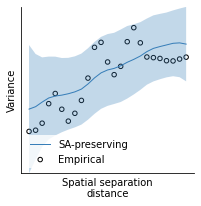

Spatially naive p-value: 0.957
SA-corrected p-value: 0.99


In [16]:
# Left Cortex, absolute SVM Weights
#distMat_left = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_left_distMat.csv",delimiter=",")
#GABRA1_left = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_left_GABRA1.csv")
svm_weights_left_abs = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_left_absolute_SVM_weights.csv",delimiter=",")

brainSMASH(distMat=distMat_left,map1=svm_weights_left_abs,map2=GABRA1_left,labels=["Absolute SVM Weights","GABRA1","Left Cortex"])

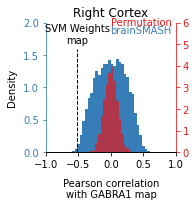

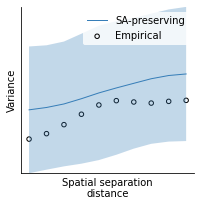

r =  -0.517912844719334
Spatially naive p-value =  0.0
SA-corrected p-value =  0.0069


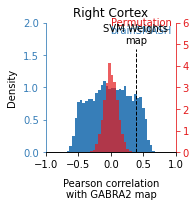

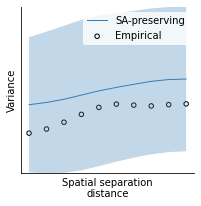

r =  0.3860225577730826
Spatially naive p-value =  0.0
SA-corrected p-value =  0.2796


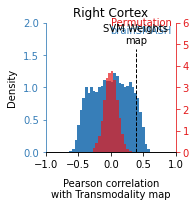

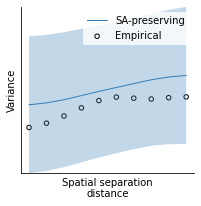

r =  0.3859125882076741
Spatially naive p-value =  0.0002
SA-corrected p-value =  0.1942


In [30]:
# Right Cortex, SVM Weights
distMat_right = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_right_distMat.csv",delimiter=",")
GABRA1_right = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_right_GABRA1.csv")
GABRA2_right = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_right_GABRA2.csv")
transmodality_right = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_right_transmodality.csv")
svm_weights_right = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_right_SVM_weights.csv",delimiter=",")

brainSMASH(distMat=distMat_right,map1=svm_weights_right,map2=GABRA1_right,labels=["SVM Weights","GABRA1","Right Cortex"])
brainSMASH(distMat=distMat_right,map1=svm_weights_right,map2=GABRA2_right,labels=["SVM Weights","GABRA2","Right Cortex"])
brainSMASH(distMat=distMat_right,map1=svm_weights_right,map2=transmodality_right,labels=["SVM Weights","Transmodality","Right Cortex"])

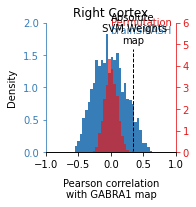

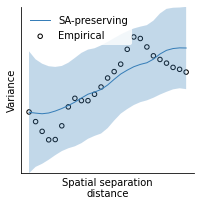

Spatially naive p-value: 0.001
SA-corrected p-value: 0.162


In [20]:
# Right Cortex, absolute SVM Weights
#distMat_right = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_right_distMat.csv",delimiter=",")
#GABRA1_right = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_right_GABRA1.csv")
svm_weights_right_abs = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_right_absolute_SVM_weights.csv",delimiter=",")

brainSMASH(distMat=distMat_right,map1=svm_weights_right_abs,map2=GABRA1_right,labels=["Absolute\n SVM Weights","GABRA1","Right Cortex"])

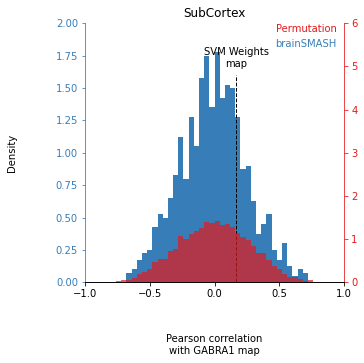

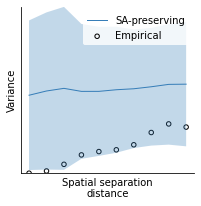

r =  0.16774744579533435
Spatially naive p-value =  0.5566
SA-corrected p-value =  0.498


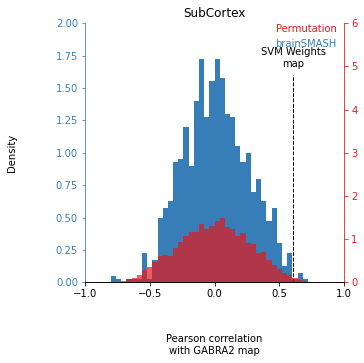

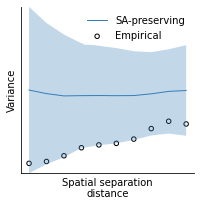

r =  0.6072727742368813
Spatially naive p-value =  0.0142
SA-corrected p-value =  0.009


In [6]:
# SubCortex, signed SVM Weights
distMat = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_subcortex_distMat.csv",delimiter=",")
GABRA1 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_subcortex_GABRA1.csv")
GABRA2 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_subcortex_GABRA2.csv")
svm_weights = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_subcortex_SVM_weights.csv",delimiter=",")

brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA1,labels=["SVM Weights","GABRA1","SubCortex"])
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA2,labels=["SVM Weights","GABRA2","SubCortex"])

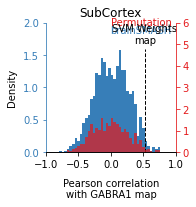

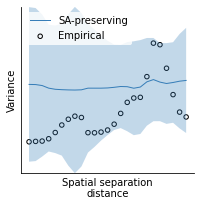

Spatially naive p-value: 0.048
SA-corrected p-value: 0.041


In [22]:
# SubCortex, absolute SVM Weights
distMat = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_subcortex_distMat.csv",delimiter=",")
GABRA1 = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_subcortex_GABRA1.csv")
svm_weights_abs = np.loadtxt("/cbica/projects/alpraz_EI/output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_subcortex_absolute_SVM_weights.csv",delimiter=",")

brainSMASH(distMat=distMat,map1=svm_weights_abs,map2=GABRA1,labels=["SVM Weights","GABRA1","SubCortex"])

In [16]:
help(Base
    )

Help on class Base in module brainsmash.mapgen.base:

class Base(builtins.object)
 |  Base(x, D, deltas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), kernel='exp', pv=25, nh=25, resample=False, b=None, seed=None, n_jobs=1)
 |  
 |  Base implementation of map generator.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) np.ndarray or filename
 |      Target brain map
 |  D : (N,N) np.ndarray or filename
 |      Pairwise distance matrix
 |  deltas : np.ndarray or List[float], default [0.1,0.2,...,0.9]
 |      Proportion of neighbors to include for smoothing, in (0, 1]
 |  kernel : str, default 'exp'
 |      Kernel with which to smooth permuted maps:
 |        'gaussian' : Gaussian function.
 |        'exp' : Exponential decay function.
 |        'invdist' : Inverse distance.
 |        'uniform' : Uniform weights (distance independent).
 |  pv : int, default 25
 |      Percentile of the pairwise distance distribution at which to
 |      truncate during variogram fitting
 |  nh : int,